<a href="https://colab.research.google.com/github/khodjasCode/predicted_prices_of_houses_ML/blob/main/LinerRegression_for_Chilanzar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head(10)

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
5,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1,28,1,4,25500
6,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1,30,2,4,21200
7,"город Ташкент, Яккасарайский район, Саламатина",Яккасарайский,2,32,5,5,20000
8,"город Ташкент, Учтепинский район, Чиланзар-21",Учтепинский,2,51,3,4,26200
9,"город Ташкент, Чиланзарский район, Чиланзар-8",Чиланзарский,1,30,1,4,22200


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

In [2]:
if df.isnull().sum().any():
  df = df.dropna()

In [3]:
df = df[df.price != 'Договорная']

In [4]:
df['price'] = pd.to_numeric(df['price']).astype(float)

In [5]:
df.loc[df['size'] == 'Площадьземли:1сот', 'size'] = 100

In [6]:
df['size'] = pd.to_numeric(df['size']).astype(float)

In [7]:
import numpy as np

max_price = np.max(df['price'].values)  # Access the 'price' column and get its maximum value using NumPy
print(max_price)

52000000.0


In [8]:
df = df[df.price != 52000000.0]

In [9]:
df = df.drop(df.sort_values(by=['price'], ascending=False).head(15).index)

In [10]:
df.describe()

,rooms,size,level,max_levels,price
count,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000
mean,2.619597,113.455281,3.694094,6.024027,58517.746980
std,1.076104,1502.653680,2.237054,2.608131,43218.073962
min,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,65.000000,3.000000,5.000000,46000.000000
75%,3.000000,85.000000,5.000000,9.000000,66452.500000
max,10.000000,70000.000000,19.000000,25.000000,425600.000000


In [11]:
df['district'].value_counts()

,count
district,
Чиланзарский,1627
Мирзо-Улугбекский,1366
Юнусабадский,875
Учтепинский,874
Мирабадский,769
Яккасарайский,650
Яшнободский,467
Шайхантахурский,373
Олмазорский,266


**Darsimiz uchun Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz**

In [12]:
housing = df[df.district=='Чиланзарский']
housing.sample(5)

,location,district,rooms,size,level,max_levels,price
3858,"город Ташкент, Чиланзарский район, Чиланзар 5-...",Чиланзарский,3,65.0,4,4,42000.0
6386,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,3,80.0,2,4,68000.0
1033,"город Ташкент, Чиланзарский район, Чиланзар 8-...",Чиланзарский,2,42.0,3,4,33000.0
4969,"город Ташкент, Чиланзарский район, Чиланзар 18...",Чиланзарский,2,50.0,4,4,35000.0
176,"город Ташкент, Чиланзарский район, Чиланзар-17",Чиланзарский,2,56.0,2,5,36000.0


In [13]:
X = housing['size']
X

,size
2,42.0
3,65.0
4,70.0
5,28.0
6,30.0
...,...
7504,70.0
7522,20.0
7533,32.0
7545,70.0


In [14]:
y = housing['price']
y

,price
2,37000.0
3,49500.0
4,55000.0
5,25500.0
6,21200.0
...,...
7504,48000.0
7522,18500.0
7533,28000.0
7545,49800.0


**Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

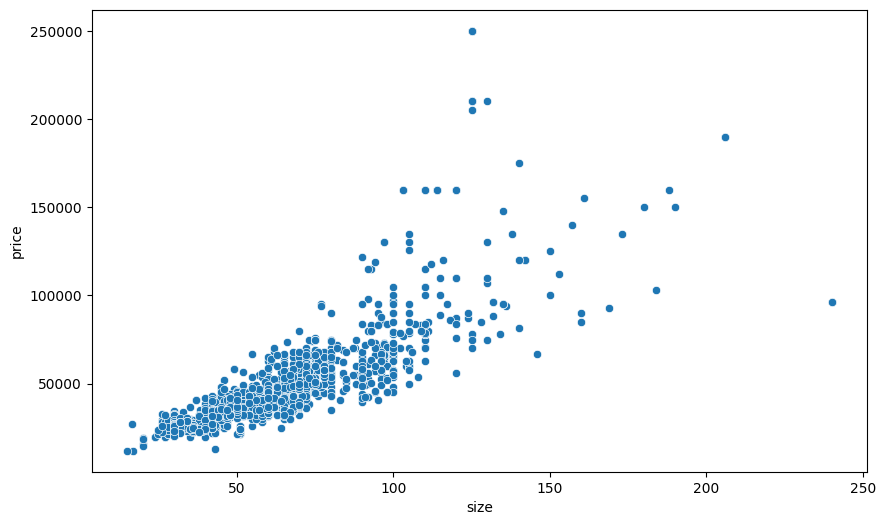

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

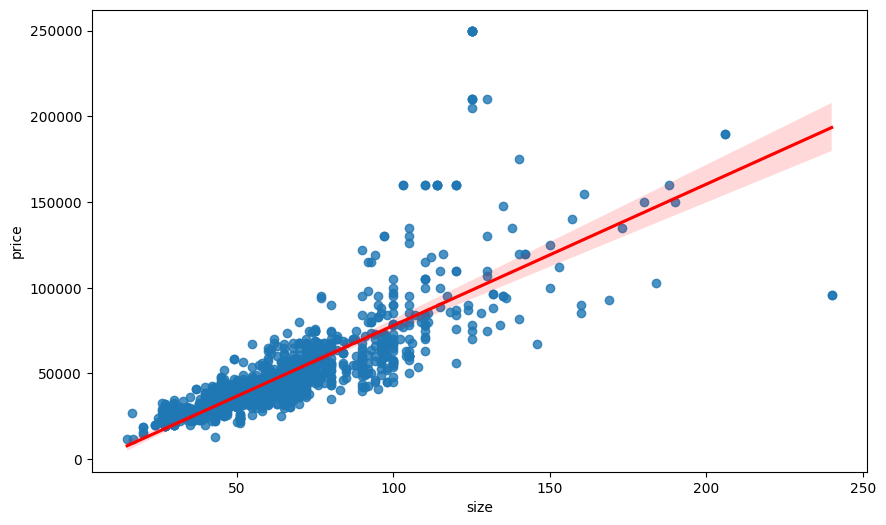

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

## 1-Vazifa
Sizning vazifangiz yuqoridagi `X` va `y` o'zgaruvchilardan quyidagi formuladan foydalangan xolda $\theta_0$ va $\theta_1$ koeffisientlarni hisoblash.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Bu yerda $\tilde{x}$ - `X` ustun uchun o'rtracha qiymat,  $\tilde{y}$ - `y` ustun uchun o'rtracha qiymat

In [18]:
numerator = ((X - X.mean()) * (y - y.mean())).sum()
denominator = ((X - X.mean()) ** 2).sum()
theta_1 = numerator / denominator

In [19]:
theta_0 = y.mean() - theta_1 * X.mean()

In [20]:
print(f"θ1 (Slope): {theta_1}")
print(f"θ0 (Intercept): {theta_0}")

θ1 (Slope): 825.2816777093782
θ0 (Intercept): -4572.669400872117


## 2-Vazifa
`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [21]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"{x_test=}")
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"{y_test=}")

x_test=array([ 48., 105.,  70.,  65.,  28.,  60.,  50.,  50.,  50.,  66.])
y_test=array([32500., 60000., 47000., 54000., 30000., 52500., 33500., 36000.,
       33000., 50500.])


In [22]:
y_predict = theta_0 + theta_1 * x_test
print(f"{y_predict=}")

y_predict=array([35040.85112918, 82081.90675861, 53197.04803878, 49070.63965024,
       18535.21757499, 44944.23126169, 36691.4144846 , 36691.4144846 ,
       36691.4144846 , 49895.92132795])


## 3-Vazifa

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [24]:
mae = mean_absolute_error(y_test, y_predict)

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 6294.803956550001
Root Mean Squared Error (RMSE): 8774.702490855543


In [25]:
MAE = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
print(f"{MAE=}")

RMSE = np.sqrt(np.sum((y_predict - y_test) ** 2) / len(y_test))
print(f"{RMSE=}")

MAE=6294.803956550001
RMSE=8774.702490855543


In [26]:
housing.shape

(1627, 7)

In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.1, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

x_train = np.asanyarray(train_set['size']).reshape(-1, 1)
y_train = np.asanyarray(train_set['price'])

LR_model.fit(x_train, y_train)

theta_1 = LR_model.coef_[0]
theta_0 = LR_model.intercept_

print(f"θ1 (Slope): {theta_1}")
print(f"θ0 (Intercept): {theta_0}")

θ1 (Slope): 808.0886020361444
θ0 (Intercept): -3670.350843271619


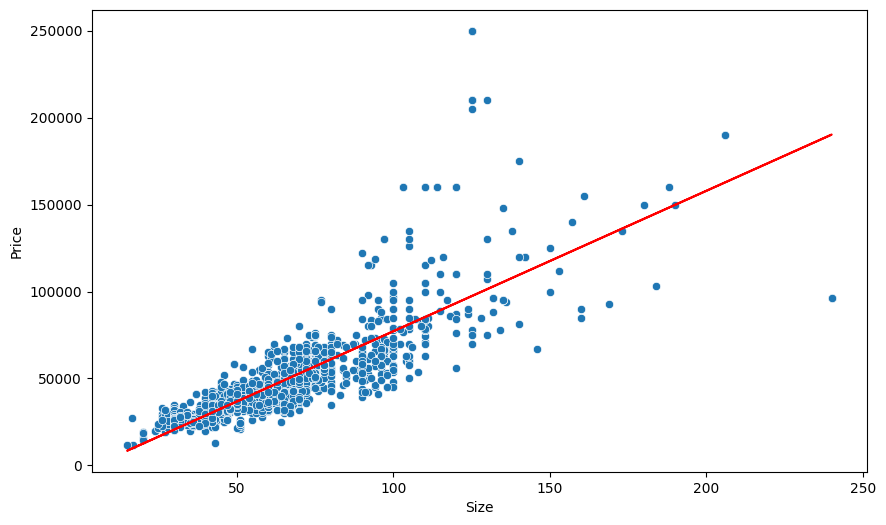

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta_0 + theta_1 * x_train, color='red')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [31]:
x_test = np.asanyarray(test_set['size']).reshape(-1, 1)
y_test = np.asanyarray(test_set['price'])

y_predict = LR_model.predict(x_test)

In [32]:
mae = mean_absolute_error(y_test, y_predict)

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 9784.266088998625
Root Mean Squared Error (RMSE): 19730.19752706688
